## Data Bootcamp UG Project
### A closer look at the 2016 Presidential Election

This notebook was created by Mashal Moeen & Abhishek Dalal

## Introduction ##

For our project we decided to study some of the demographic and economic factors on a county level basis across the United States and its correlation with the corresponding Vote Share for the Republican Presidential nominee Donald Trump during last month's general election. We start off by examining overall national trends and eventually look at the individual vote shares within the key rust belt states of Ohio, Wisconsin, Pennsylvania and Michigan, which were the states which flipped from Blue to Red in this election

In order to organize our project we will be particularly interested in identifying the correlation between a county's level of education, age breakdown, education levels and median income with the corresponding voteshare for Trump within the county. In order to run a comprehensive analysis of these effects, we first imported the data from the sources into Python. 

## Importing Packages ##

In [1]:
# import packages 
import pandas as pd                          
import matplotlib.pyplot as plt              
import matplotlib as mpl                     
import numpy as np                           
import seaborn as sns
import sys
import os
from plotly.offline import iplot, iplot_mpl  
import plotly.graph_objs as go               
import plotly                                
import cufflinks as cf                       
cf.set_config_file(offline=True, offline_show_link=False)

# IPython command, puts plots in notebook 
%matplotlib inline

# check Python version 
import datetime as dt 
import sys
print('Today is', dt.date.today())
print('What version of Python are we running? \n', sys.version, sep='') 

/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Today is 2016-12-22
What version of Python are we running? 
3.5.2 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


## Data Sources and Description ##

Our primary data source for this project is the Github repository titled: 'Did-China-Cause-Trump'. The repository has compiled election data as well as data from demographic surveys from public websites, and their links have been attached in the Bibliography section. In order to run any meaningful analysis we must first import the data into Pandas. 

Election Data: The first part of the importing process involves importing election data from the Github repository into the notebook. We then create a Dataframe that displays the total number of votes and Trump's Vote Count on a county level basis. Some additional code has been written to clean up the data. 

In [2]:
# vote count data

url = 'https://raw.githubusercontent.com/mwaugh0328/Did-China-Cause-Trump/master/us-election-2016-results-by-county.csv'
election = pd.read_csv(url)

election.drop(election.columns[[0,2,5]], axis=1, inplace=True)              # drop superflous data
election = election.rename(columns={'CountyName': 'County'})                # rename column
election['County'] =  election['County'].astype(str) + ' ' + 'County'       # append enteries in the series

election = election[election.Candidate == 'Trump']                          # only look at Trump data
election['StateName'] = election['StateName'].str.capitalize()              # this will simplify merging
election['Geography'] = election['County'] + ", " + election['StateName']   # this will simplify merging
election = election.set_index('Geography')                                  # set index
election = election.drop(['StateName','County'], axis = 1)                  # drop superflous data
election.head()

CountyTotalVote Candidate  VoteCount
Geography                                                   
Alaska County, Alaska            246588     Trump   130415.0
Macon County, Alabama              8748     Trump     1394.0
Wilcox County, Alabama             6095     Trump     1737.0
Coosa County, Alabama              5223     Trump     3376.0
Blount County, Alabama            25384     Trump    22808.0

Demographic Data: We now import data based on the census surveys. We are interested in identifying education levels, age and gender break downs and median earnings within a county. Once again we create a dataframe in order to import this data into the notebook. Some additional code has been written to clean up the data. Once again this data is organized on a county level basis.

In [3]:
# demographic data

url1 = "https://raw.githubusercontent.com/mwaugh0328/Did-China-Cause-Trump/master/acs_education_fine.csv"
eco = pd.read_csv(url1,
                 skiprows = 1,                    # skip the column codes
                 na_values = ["*****",'(X)'],     # missing values
                 )
eco = eco.set_index('Geography')                  # set index
eco= eco.iloc[:,2:224:2]                          # get rid of margin of error columns
eco.head(5)

Total; Estimate; Population 18 to 24 years  \
Geography                                                             
Autauga County, Alabama                                        4689   
Baldwin County, Alabama                                       14752   
Barbour County, Alabama                                        2421   
Bibb County, Alabama                                           2067   
Blount County, Alabama                                         4716   

                         Male; Estimate; Population 18 to 24 years  \
Geography                                                            
Autauga County, Alabama                                       2375   
Baldwin County, Alabama                                       7544   
Barbour County, Alabama                                       1464   
Bibb County, Alabama                                          1133   
Blount County, Alabama                                        2446   

                         Female; Estimate; Population 18 to 24 years  \
Geography                                                              
Autauga County, Alabama                                         2314   
Baldwin County, Alabama                                         7208   
Barbour County, Alabama                                          957   
Bibb County, Alabama                                             934   
Blount County, Alabama                                          2270   

                         Total; Estimate; Less than high school graduate  \
Geography                                                                  
Autauga County, Alabama                                             21.1   
Baldwin County, Alabama                                             20.7   
Barbour County, Alabama                                             24.3   
Bibb County, Alabama                                                27.0   
Blount County, Alabama                                              24.3   

                        Male; Estimate; Less than high school graduate  \
Geography                                                                
Autauga County, Alabama                                           20.2   
Baldwin County, Alabama                                           24.4   
Barbour County, Alabama                                           32.9   
Bibb County, Alabama                                              29.7   
Blount County, Alabama                                            24.4   

                        Female; Estimate; Less than high school graduate  \
Geography                                                                  
Autauga County, Alabama                                             22.1   
Baldwin County, Alabama                                             16.9   
Barbour County, Alabama                                             11.1   
Bibb County, Alabama                                                23.8   
Blount County, Alabama                                              24.1   

                         Total; Estimate; High school graduate (includes equivalency)  \
Geography                                                                               
Autauga County, Alabama                                               37.7              
Baldwin County, Alabama                                               32.3              
Barbour County, Alabama                                               35.7              
Bibb County, Alabama                                                  33.2              
Blount County, Alabama                                                34.6              

                        Male; Estimate; High school graduate (includes equivalency)  \
Geography                                                                             
Autauga County, Alabama                                               38.8            
Baldwin County, Alabama                                      

Upon further inspection of the dataframe we thought it would be wiser to rename some of the columns in the second data frame so that it would be easier to run further analysis. We also decided to parse the data frame for columns that were most important for our analysis and only retain those for the remainder of the project.

In [4]:
# rename columns

eco = eco.rename(columns={'Total; Estimate; Percent high school graduate or higher': 'Total Population (%) > HS',
                          "Total; Estimate; Percent bachelor's degree or higher" : 'Total Population (%) > BS',
                          'Total; Estimate; Population 18 to 24 years': 'Total Age 18-24',
                           'Male; Estimate; Population 18 to 24 years': 'Male Age 18-24',
                           'Female; Estimate; Population 18 to 24 years': 'Female Age 18-24',
                          'Total; Estimate; Population 25 to 34 years': 'Total Age 25-34',
                           'Male; Estimate; Population 25 to 34 years': 'Male Age 25-34',
                           'Female; Estimate; Population 25 to 34 years': 'Female Age 25-34',
                          'Total; Estimate; Population 35 to 44 years': 'Total Age 35-44',
                           'Male; Estimate; Population 35 to 44 years': 'Male Age 35-44',
                           'Female; Estimate; Population 35 to 44 years': 'Female Age 35-44',
                          'Total; Estimate; Population 45 to 64 years': 'Total Age 45-64',
                           'Male; Estimate; Population 45 to 64 years': 'Male Age 45-64',
                          'Female; Estimate; Population 45 to 64 years': 'Female Age 45-64',
                          'Total; Estimate; Population 65 years and over':'Total Age 65+',
                           'Male; Estimate; Population 65 years and over': 'Male Age 65+',
                          'Female; Estimate; Population 65 years and over': 'Female Age 65+',
                          'Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings': 'Median Earnings Age >25',
                          "Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Less than high school graduate":'Median Earnings Age >25, No HS',
                          "Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - High school graduate (includes equivalency)": 'Median Earnings Age >25, HS',
                          "Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Some college or associate's degree":'Median Earnings Age >25, Some BS',
                          "Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Bachelor's degree":'Median Earnings Age >25, BS',
                          "Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings - Graduate or professional degree":'Median Earnings Age >25, Graduate'
                         })


In [35]:
# keep columns of interest

eco = eco[['Total Population (%) > HS',
           'Total Population (%) > BS',
           'Total Age 18-24',
           'Male Age 18-24',
           'Female Age 18-24',
           'Total Age 25-34',
           'Male Age 25-34',
           'Female Age 25-34',
           'Total Age 35-44',
           'Male Age 35-44',
           'Female Age 35-44',
           'Total Age 45-64',
           'Male Age 45-64',
           'Female Age 45-64',
           'Total Age 65+',
           'Male Age 65+',
           'Female Age 65+',
           'Median Earnings Age >25',
           'Median Earnings Age >25, No HS',
           'Median Earnings Age >25, HS',
           'Median Earnings Age >25, Some BS',
           'Median Earnings Age >25, BS',
           'Median Earnings Age >25, Graduate'
          ]]
eco.shape                

(3142, 23)

The next step involved combining the two dataframes so that we could easily draw graphics displaying salient trends and drawing important conclusions about correlations between demographic data and voting patterns. Additionally, we decided to create further columns to standardize variables across counties by taking percentages.

In [6]:
# combine data frames and create new columns

df = pd.concat([election, eco],                        # merge both data frames
              axis = 1,                                # merge on columns 
             join_axes = [election.index]              # take the row labels from election data frame
             )

# create % columns for further analysis 
df['VoteShare'] = (df['VoteCount'] / df ['CountyTotalVote'])*100
df['Total Population'] = df['Total Age 18-24'] + df['Total Age 25-34'] + df['Total Age 35-44'] + df['Total Age 45-64'] + df['Total Age 65+']
df['Population % 18-24'] = (df['Total Age 18-24'] / df['Total Population'])*100
df['Population % 25-34'] = (df['Total Age 25-34'] / df['Total Population'])*100
df['Population % 35-44'] = (df['Total Age 35-44'] / df['Total Population'])*100
df['Population % 45-64'] = (df['Total Age 45-64'] / df['Total Population'])*100
df['Population % 65+'] = (df['Total Age 65+'] / df['Total Population'])*100
df['% Male 18-24'] = (df['Male Age 18-24'] / df['Total Population'])*100
df['% Female 18-24'] = (df['Female Age 18-24'] / df['Total Population'])*100
df['% Male 25-34'] = (df['Male Age 25-34'] / df['Total Population'])*100
df['% Female 25-34'] = (df['Female Age 25-34'] / df['Total Population'])*100
df['% Male 35-44'] = (df['Male Age 35-44'] / df['Total Population'])*100
df['% Female 35-44'] = (df['Female Age 35-44'] / df['Total Population'])*100
df['% Male 45-64'] = (df['Male Age 45-64'] / df['Total Population'])*100
df['% Female 45-64'] = (df['Female Age 45-64'] / df['Total Population'])*100
df['% Male 65+'] = (df['Male Age 65+'] / df['Total Population'])*100
df['% Female 65+'] = (df['Male Age 65+'] / df['Total Population'])*100
df['Total Male'] = df['Male Age 18-24'] + df['Male Age 25-34'] + df['Male Age 35-44'] + df['Male Age 45-64'] + df['Male Age 65+']
df['% Male'] = (df['Total Male'] / df['Total Population'])*100
df['Total Female'] = df['Female Age 18-24'] + df['Female Age 25-34'] + df['Female Age 35-44'] + df['Female Age 45-64'] + df['Female Age 65+']
df['% Female'] = (df['Total Female'] / df['Total Population'])*100
df = df.dropna()

df.head(5)


CountyTotalVote Candidate  VoteCount  \
Geography                                                       
Macon County, Alabama               8748     Trump     1394.0   
Wilcox County, Alabama              6095     Trump     1737.0   
Coosa County, Alabama               5223     Trump     3376.0   
Blount County, Alabama             25384     Trump    22808.0   
Winston County, Alabama            10255     Trump     9225.0   

                         Total Age 18-24  Male Age 18-24  Female Age 18-24  \
Geography                                                                    
Macon County, Alabama             3970.0          1739.0            2231.0   
Wilcox County, Alabama             967.0           515.0             452.0   
Coosa County, Alabama              890.0           493.0             397.0   
Blount County, Alabama            4716.0          2446.0            2270.0   
Winston County, Alabama           1781.0           912.0             869.0   

                         Total; Estimate; Less than high school graduate  \
Geography                                                                  
Macon County, Alabama                                               10.0   
Wilcox County, Alabama                                              23.7   
Coosa County, Alabama                                               19.1   
Blount County, Alabama                                              24.3   
Winston County, Alabama                                             22.9   

                        Male; Estimate; Less than high school graduate  \
Geography                                                                
Macon County, Alabama                                             15.2   
Wilcox County, Alabama                                            24.1   
Coosa County, Alabama                                             25.2   
Blount County, Alabama                                            24.4   
Winston County, Alabama                                           22.7   

                        Female; Estimate; Less than high school graduate  \
Geography                                                                  
Macon County, Alabama                                                  6   
Wilcox County, Alabama                                              23.2   
Coosa County, Alabama                                               11.6   
Blount County, Alabama                                              24.1   
Winston County, Alabama                                               23   

                         Total; Estimate; High school graduate (includes equivalency)  \
Geography                                                                               
Macon County, Alabama                                                 20.7              
Wilcox County, Alabama                                                48.9              
Coosa County, Alabama                                                 25.8              
Blount County, Alabama                                                34.6              
Winston County, Alabama                                               36.9              

                           ...     % Male 35-44 % Female 35-44  % Male 45-64  \
Geography                  ...                                                 
Macon County, Alabama      ...         5.724109       6.622836     14.988841   
Wilcox County, Alabama     ...         6.427132       8.526029     17.585675   
Coosa County, Alabama      ...         8.465086       7.575758     20.575318   
Blount County, Alabama     ...         8.609029       8.657010     17.604186   
Winston County, Alabama    ...         7.762820       7.846629     18.458960   

                        % Female 45-64 % Male 65+  % Female 65+ Total Male  \
Geography                                                                    
Macon County, Alabama        17.419627   7.847277      7.847277     7425.0   
Wilcox County, Ala

## General Nationwide Trends: ##

First we look at the countrywide correlationship between demographic patterns within counties and the corresponding Vote Share for Trump. 

### Education and Voting Patterns ###

We plot two scatter diagrams comparing the correlationship between the percentage of High School graduates within a county and the corresponding Vote Share for Trump. In the second case we plot the percentage of Bachelors Degree or higher holders and the corresponding Vote Share for Trump. 

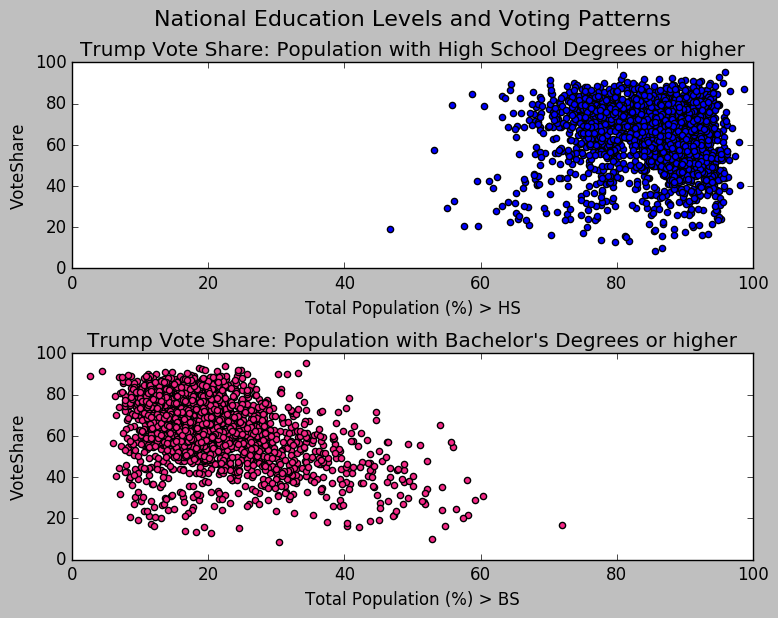

In [7]:
plt.style.use("classic")

fig, ax = plt.subplots(2)

df.plot(x="Total Population (%) > HS", y="VoteShare", ax=ax[0], kind="scatter",
                                 color="blue")
df.plot("Total Population (%) > BS", y="VoteShare", ax=ax[1], kind="scatter",
                                   color="#F52887")

# set axis limits
ax[0].set_xlim(0, 100)
ax[1].set_xlim(0, 100)
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)

# set axis titles
ax[0].set_title("Trump Vote Share: Population with High School Degrees or higher")
ax[1].set_title("Trump Vote Share: Population with Bachelor's Degrees or higher")
figure_title = "National Education Levels and Voting Patterns"

#set figure title
plt.text(0.5, 1.18,                                # location of title
         figure_title,                             # title
         horizontalalignment='center',             # title alignment
         fontsize=16,
         transform = ax[0].transAxes               # title placement
        )

fig.tight_layout()

Comparing the two scatter graphs above, we can infer some of the general voting patterns nationwide. While the first plot shows a more clustered data set the second plot shows a  declining pattern between the total county population that has acquired a bachelors degree the corresponding vote share for Trump. Voters with just a high school diploma were more likely to vote for Trump and counties with a less educated population generally supported Trump.

## Age and Voting Patterns ## 

We now plot two scatter diagrams comparing the Vote Share for Trump with the percentage of county population between 18-24 and over 65.

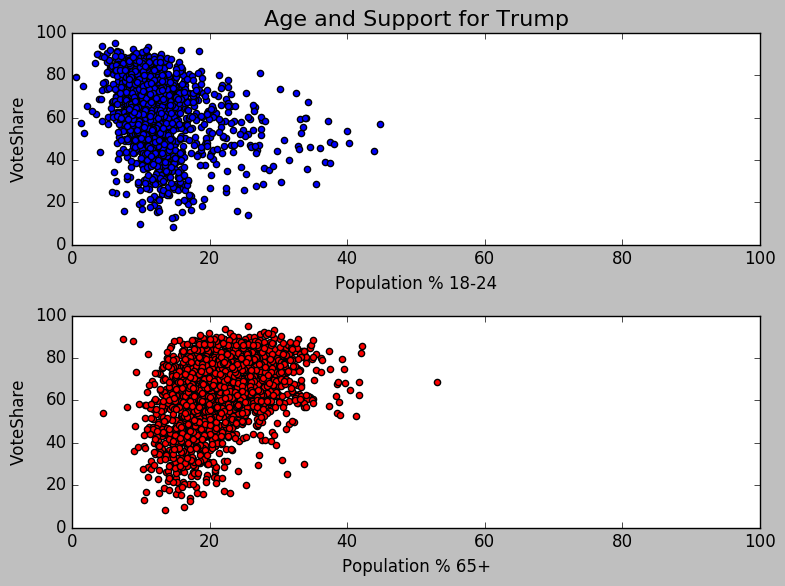

In [8]:
fig, ax = plt.subplots(2)

df.plot(x="Population % 18-24", y="VoteShare", ax=ax[0], kind="scatter",
                                 color="blue")
df.plot(x="Population % 65+", y="VoteShare", ax=ax[1], kind="scatter",
                                   color="red")

# set axis limits
ax[0].set_xlim(0, 100)
ax[1].set_xlim(0, 100)
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)

# set axis title
ax[0].set_title("Age and Support for Trump", fontsize = 16)


fig.tight_layout()

Both scatter plots display a significant amount of clustering. Although there is a discernible negative trend between the percentage of people in a county aged 18-24 and the corresponding Trump Vote Share. On the other hand there is a positive trend between the percentage of a county aged over 65 and the corresponding voteshare for Trump. 

### Gender and Voting Patterns ###

Next we compare the correlationship between the percentage of Males and then Females within a county and the corresponding Vote Share for Trump.

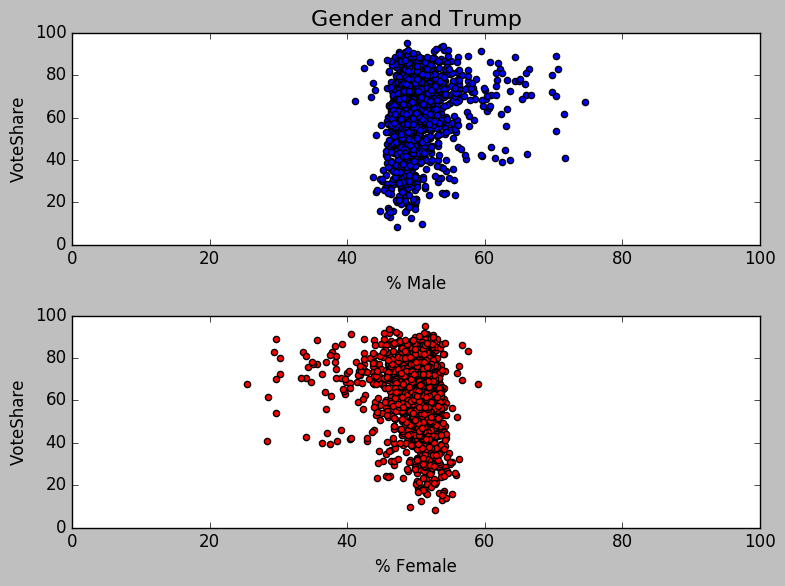

In [9]:
fig, ax = plt.subplots(2)

df.plot(x="% Male", y="VoteShare", ax=ax[0], kind="scatter",
                                 color="blue")
df.plot(x="% Female", y="VoteShare", ax=ax[1], kind="scatter",
                                   color="red")

# set axis limits
ax[0].set_xlim(0, 100)
ax[1].set_xlim(0, 100)
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)

# set axis title
ax[0].set_title("Gender and Trump", fontsize = 16)


fig.tight_layout()

The two scatters do not provide much information about the relationship between gender and support for Trump. Interestingly enough, there appears to be a lot more counties with a Male population of greater than 50% than counties with Females comprising more than 50%. Similarly, there are more counties with fewer than 30% Females than counties with fewer than 30% Males.

### Income and Voting Patterns ###

Finally we draw a regression plot of the county level Median Income on the corresponding Voteshare for Trump.

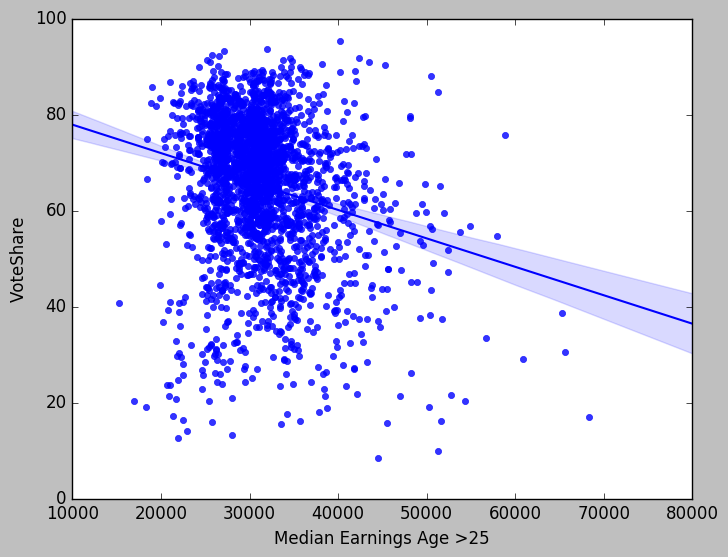

In [10]:
# regression plot showing relation between income and suport for Trump

sns.regplot(x="Median Earnings Age >25", y="VoteShare", data=df)

The preliminary reading of the graph above clearly shows that as the Median Earnings in a county increase, Trump's Vote Share within the county decreases.

Nationwide data shows an ambiguous relationship between support for Trump and our chosen estimators. It is probably more fruitful to look at trends within the four specific rust-belt states that swung from Blue to Red from 2012: Michigan, Pennsylvania, Ohio and Wisconsin.

# Swing States #

In [11]:
dfmi = df[df.index.str.contains("Michigan")==True]           # Michigan
dfpa = df[df.index.str.contains("Pennsylvania")==True]       # Pennsylvania
dfwi = df[df.index.str.contains('Wisconsin')==True]          # Wisconsin
dfoh = df[df.index.str.contains("Ohio")==True]               # Ohio

We will now repeat the analysis we conducted for the overall Nationwide trend for all the four states mentioned above and note our observations.

# Michigan #
We are going to study the county wide support for Trump in Michigan first.


## Michigan: Education and Support for Trump ##

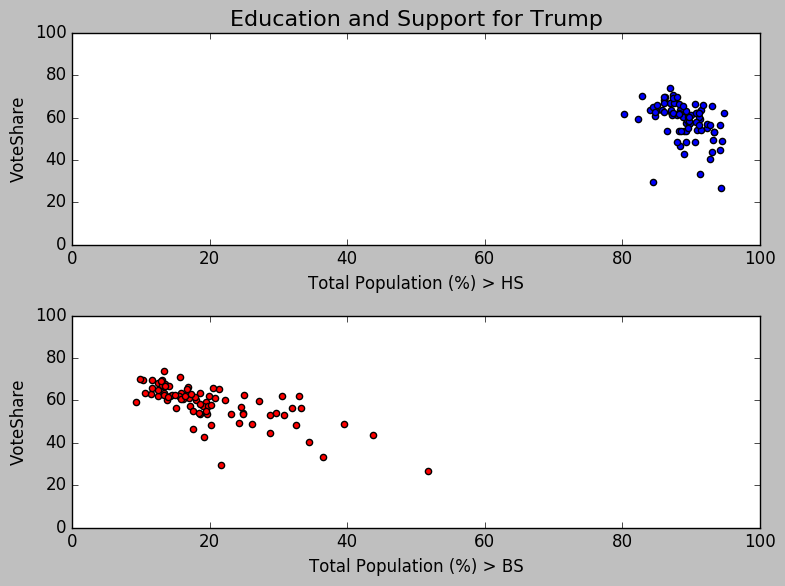

In [12]:
fig, ax = plt.subplots(2)

dfmi.plot(x="Total Population (%) > HS", y="VoteShare", ax=ax[0], kind="scatter",
                                 color="blue")
dfmi.plot(x="Total Population (%) > BS", y="VoteShare", ax=ax[1], kind="scatter",
                                   color="red")

# set axis limits
ax[0].set_xlim(0, 100)
ax[1].set_xlim(0, 100)
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)

# set axis title
ax[0].set_title("Education and Support for Trump", fontsize = 16)


fig.tight_layout()

As you can interpret from the graphs, most Michigan counties have a higher proportion of population with High School diplomas; a demographic group more likely to vote for Trump. Population with Bachelors or higher degrees form a smaller percentage and even though this demographic shows a negative trend and were less likely to vote for Trump, their relative size is dominated by the less educated demographic helping explain the election outcome in Michigan.

## Michigan: Age and Support for Trump ##

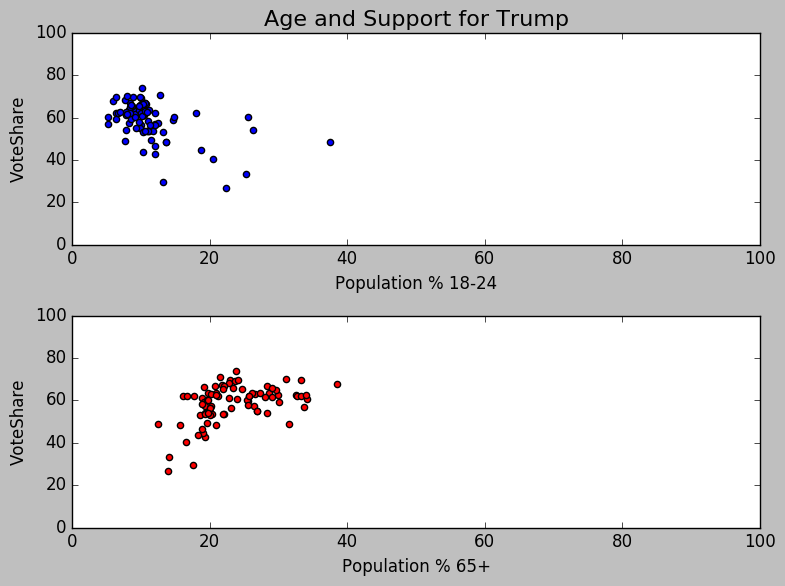

In [13]:
fig, ax = plt.subplots(2)

dfmi.plot(x="Population % 18-24", y="VoteShare", ax=ax[0], kind="scatter",
                                 color="blue")
dfmi.plot(x="Population % 65+", y="VoteShare", ax=ax[1], kind="scatter",
                                   color="red")

# set axis limits
ax[0].set_xlim(0, 100)
ax[1].set_xlim(0, 100)
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)

# set axis title
ax[0].set_title("Age and Support for Trump", fontsize = 16)


fig.tight_layout()

As can be seen from the plot above, counties with a greater proportion of younger population are less likely to vote for Trump. However, counties with an older population base are more likely to vote for Trump. There is a visible downward trend in the first figure implying that counties with younger voters generally did not support Trump, hoowever, this relationship is weakened (more variable) as the percentage of young voters increases. On the other hand, counties with older voters favored Trump and demonstrated a strong positive relation between percentage of old voters and support for Trump. The two effects combined are sufficient to explain the election results.

## Michigan: Gender and Support for Trump

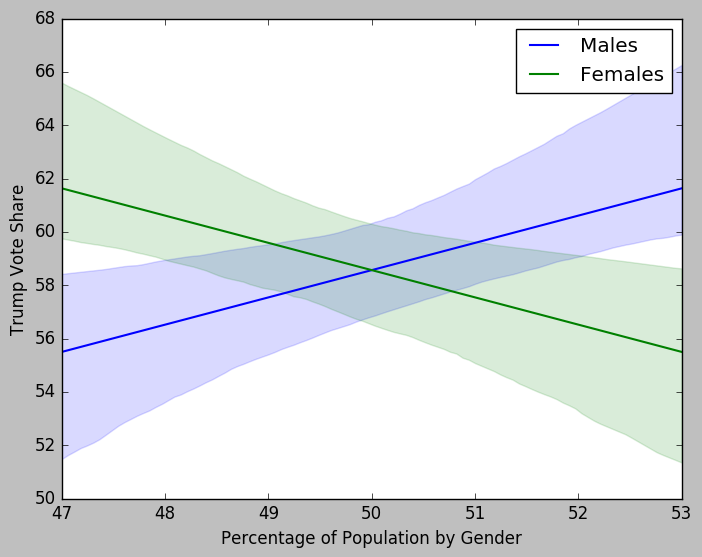

In [14]:
m = sns.regplot("% Male", "VoteShare", data=dfmi, scatter = False, label = "Males")
f = sns.regplot("% Female", "VoteShare", data=dfmi, scatter = False, label = "Females")
plt.legend(loc='upper right')
plt.xlabel('Percentage of Population by Gender')
plt.ylabel('Trump Vote Share')

We see a striking contrast between voting patterns in Michigan counties as a greater percentage of population tends to either male or female. Counties with more than 50% men tended to be more supportive of Trump, whereas when the percentage of women in a county increased, support for Trump fell considerably. We may infer from the lection results that most Michigan counties have more male citizens compared to females.

## Michigan: Income and Support for Trump ##

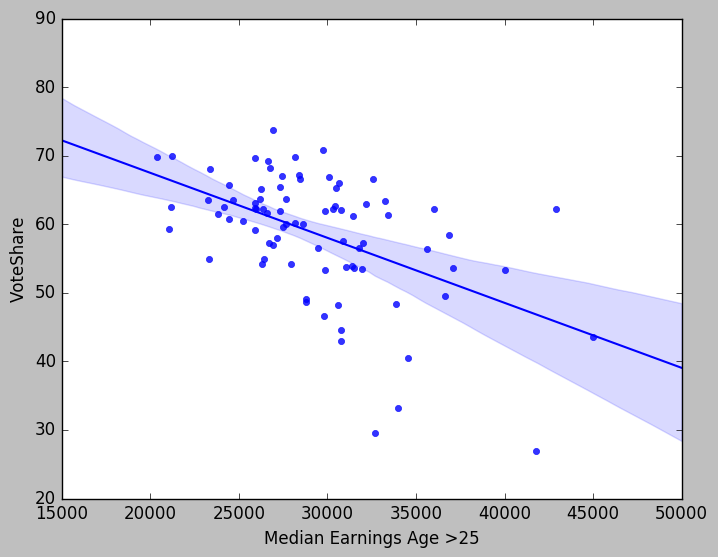

In [15]:
g = sns.regplot("Median Earnings Age >25", "VoteShare", data=dfmi)

Michigan follows the trend seen across the US and there appears to be a strong negative relationship between Median Eearnings Age >25 and the corresponding county's support for Trump in Michigan.


# Ohio #

## Ohio: Education and Support for Trump ##

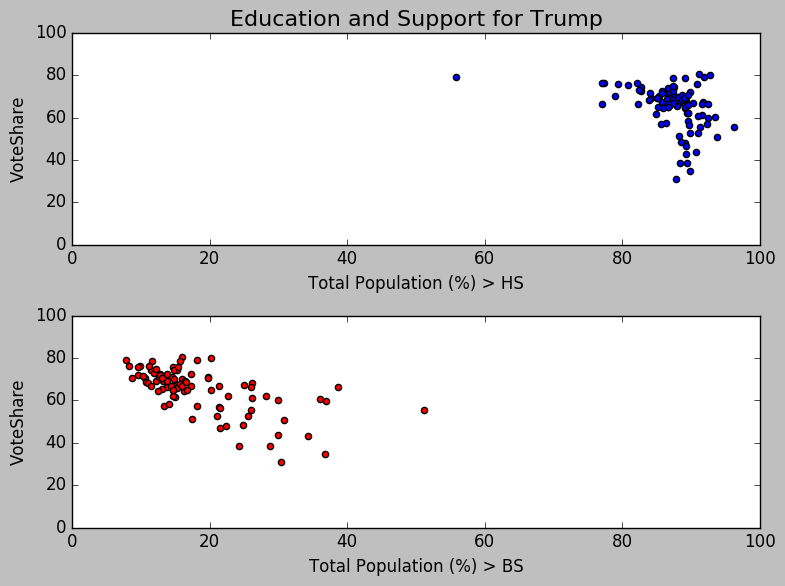

In [16]:
fig, ax = plt.subplots(2)

dfoh.plot(x="Total Population (%) > HS", y="VoteShare", ax=ax[0], kind="scatter",
                                 color="blue")
dfoh.plot(x="Total Population (%) > BS", y="VoteShare", ax=ax[1], kind="scatter",
                                   color="red")

# set axis limits
ax[0].set_xlim(0, 100)
ax[1].set_xlim(0, 100)
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)

# set axis title
ax[0].set_title("Education and Support for Trump", fontsize = 16)


fig.tight_layout()

The scatter on top indicates a high amount of clustering thus implying that there was generally strong support for Trump amongst counties with a high percentage of High School Graduates. The scatter below shows a discernible but weak negative trend, wherein the county was less likely to support Trump as the percentage of people with Bachelors degrees increased. However, the negative relationship isn't strong enough to dominate the high school educatedd demographic group which forms the majoroity of Ohio population and is hence responsible for turning the state red this election day.

## Ohio: Age and Support For Trump ##

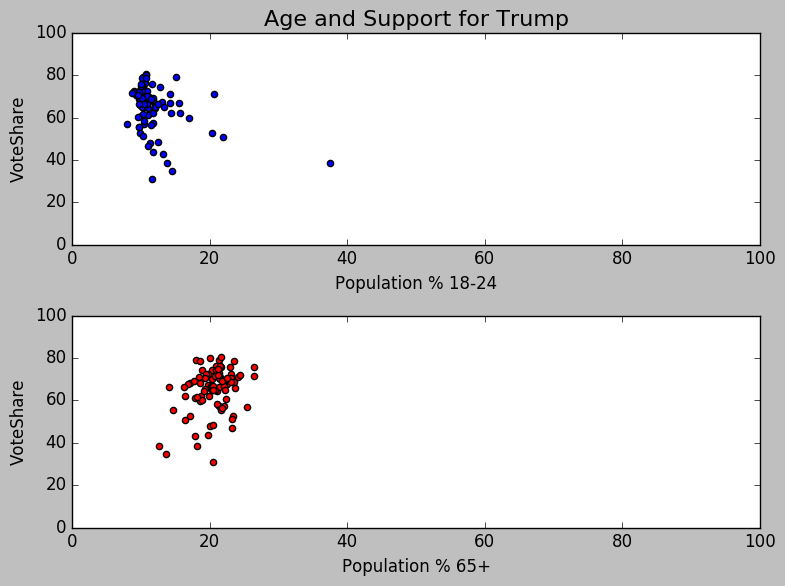

In [17]:
fig, ax = plt.subplots(2)

dfoh.plot(x="Population % 18-24", y="VoteShare", ax=ax[0], kind="scatter",
                                 color="blue")
dfoh.plot(x="Population % 65+", y="VoteShare", ax=ax[1], kind="scatter",
                                   color="red")

# set axis limits
ax[0].set_xlim(0, 100)
ax[1].set_xlim(0, 100)
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)

# set axis title
ax[0].set_title("Age and Support for Trump", fontsize = 16)


fig.tight_layout()

As can be seen from the plot above, there is a negative but weak trend between support for Trump and the percentage of younger people within the county. The older demographic, on the other hand, reveals a strong psoitive relationship helping explain the flip from blue to red.

## Ohio : Gender and Support for Trump ##

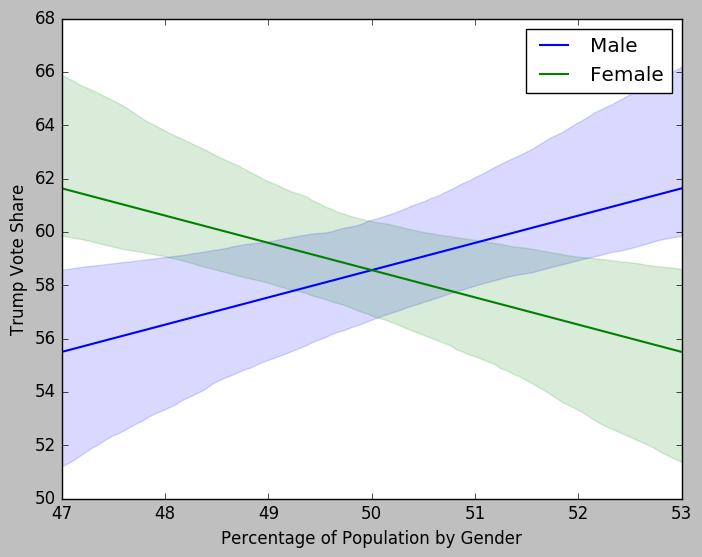

In [18]:
m = sns.regplot("% Male", "VoteShare", data=dfmi, scatter = False, label = "Male")
f = sns.regplot("% Female", "VoteShare", data=dfmi, scatter = False, label = "Female")
plt.legend(loc='upper right')
plt.xlabel('Percentage of Population by Gender')
plt.ylabel('Trump Vote Share')

We see the same contrast between voting patterns in Ohio counties as a greater percentage of population is either male or female. Counties with more than 50% men tended to be more supportive of Trump, whereas when the percentage of women in a county increased, support for Trump fell considerably. It must be noted that there were more counties with more than a 50% male population which may help explain why Trump won the state of Ohio.

## Ohio : Income and Support for Trump ##

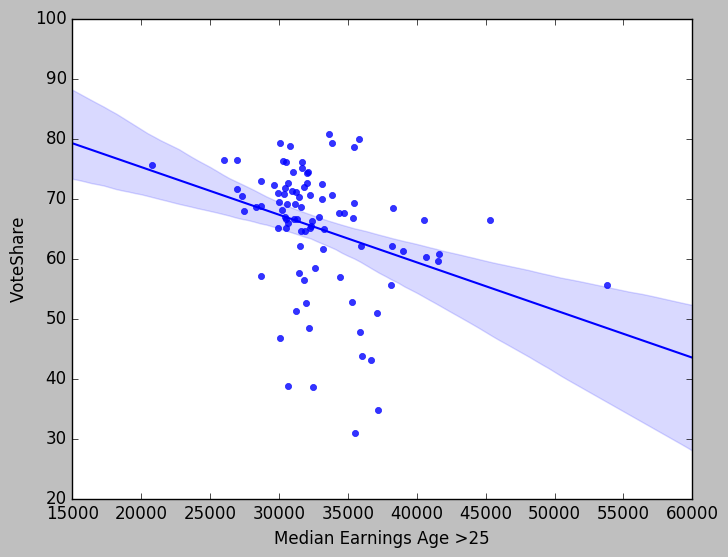

In [19]:
g = sns.regplot("Median Earnings Age >25", "VoteShare", data=dfoh)

There is a strong negative corelationship between Median Earnings and Support for Trump, as observed in other states and the nationwide vote.

# Pennslyvania #

## Pennsylvania: Education and Support For Trump ##

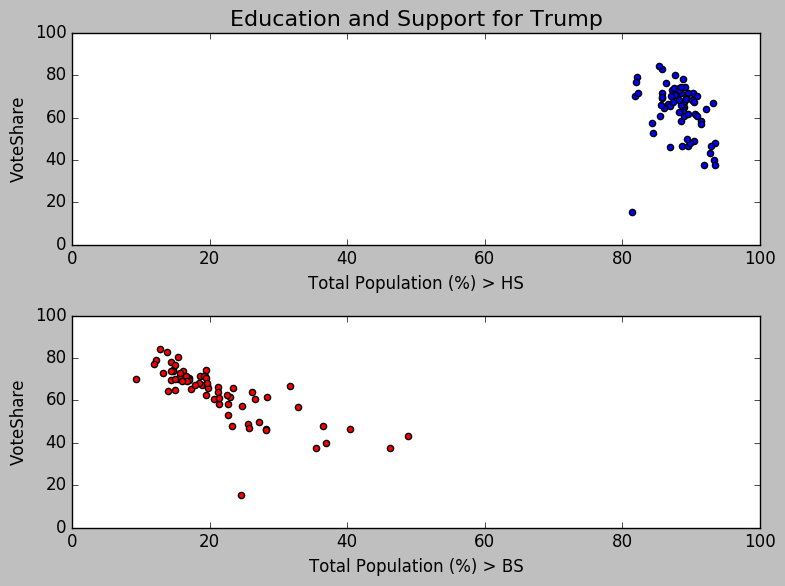

In [20]:
fig, ax = plt.subplots(2)

dfpa.plot(x="Total Population (%) > HS", y="VoteShare", ax=ax[0], kind="scatter",
                                 color="blue")
dfpa.plot(x="Total Population (%) > BS", y="VoteShare", ax=ax[1], kind="scatter",
                                   color="red")

# set axis limits
ax[0].set_xlim(0, 100)
ax[1].set_xlim(0, 100)
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)

# set axis title
ax[0].set_title("Education and Support for Trump", fontsize = 16)


fig.tight_layout()

We can observe that the scatter above is clustered, indicating a high level support for Trump within counties that have a high population of High School graduates, with a little more variance. The scatter below shows a clear negative relationship, support for Trump falls as the percentage of people with college degrees increases. But since the high school educated population far exceeds higher educated population, we can clearly see why Trump won the state of Pennsylvania, a trend we have observed in other states as well.

## Pennsylvania: Age and Support for Trump ##


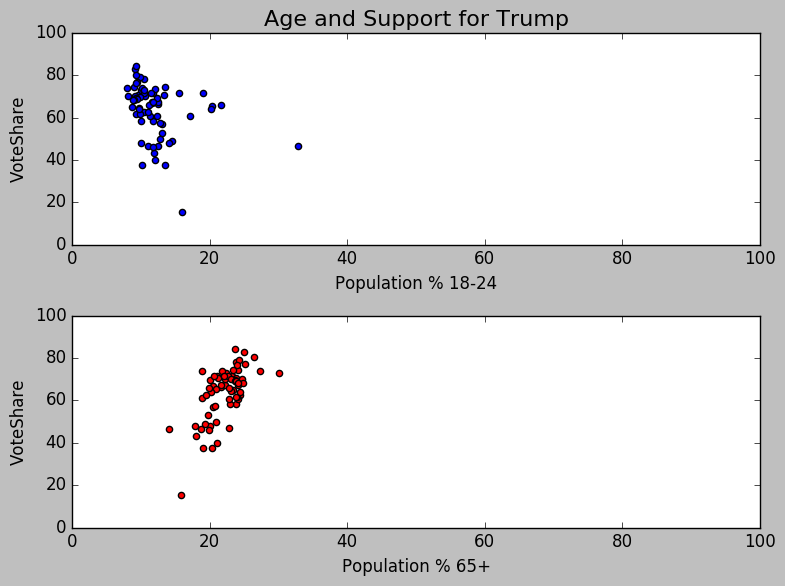

In [21]:
fig, ax = plt.subplots(2)

dfpa.plot(x="Population % 18-24", y="VoteShare", ax=ax[0], kind="scatter",
                                 color="blue")
dfpa.plot(x="Population % 65+", y="VoteShare", ax=ax[1], kind="scatter",
                                   color="red")

# set axis limits
ax[0].set_xlim(0, 100)
ax[1].set_xlim(0, 100)
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)

# set axis title
ax[0].set_title("Age and Support for Trump", fontsize = 16)


fig.tight_layout()

Young voters in Pennsylvania demonstrate a weakly negative relationship with support for Trump while older voters show a strong positive relation with support for Trump. older voters were vehement in showing their  support for Trump but young voters in Pennsylvania do not seem to have showcased a similar interest in the lecetion. This may help explain why the blue state turned red this election day. 

## Pennsylvania: Gender and Support for Trump ##

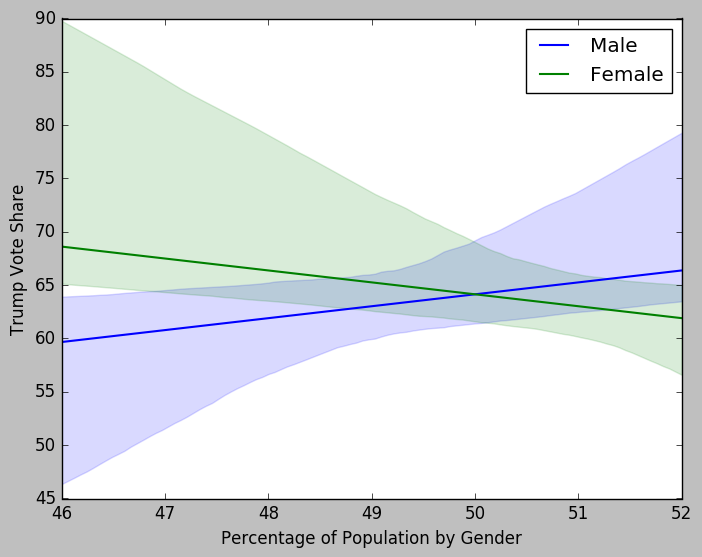

In [22]:
g = sns.regplot("% Male", "VoteShare", data=dfpa, scatter = False, label = "Male")
b = sns.regplot("% Female", "VoteShare", data=dfpa, scatter = False, label = "Female")
plt.legend(loc='upper right')
plt.xlabel('Percentage of Population by Gender')
plt.ylabel('Trump Vote Share')

The gender divide is less pronounced in Pennsylvania, however the general trend holds true, and there is an increase in support as Male population increases, whereas the opposite occurs when the female population increases. We can see from the shaded area that the female vote was a lot more variable in Pennsylvania and edged towards supporting Trump.

## Pennsylvania: Income and Support for Trump ##

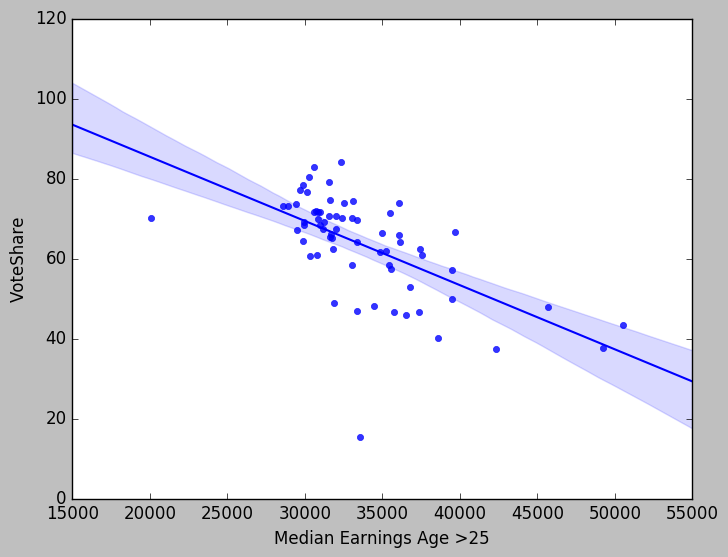

In [23]:
g = sns.regplot("Median Earnings Age >25", "VoteShare", data=dfpa)

There is a strong negative relationship between the Median Earnings of a county and general support for Trump. 

## Wisconsin ## 

## Education and Support For Trump ##


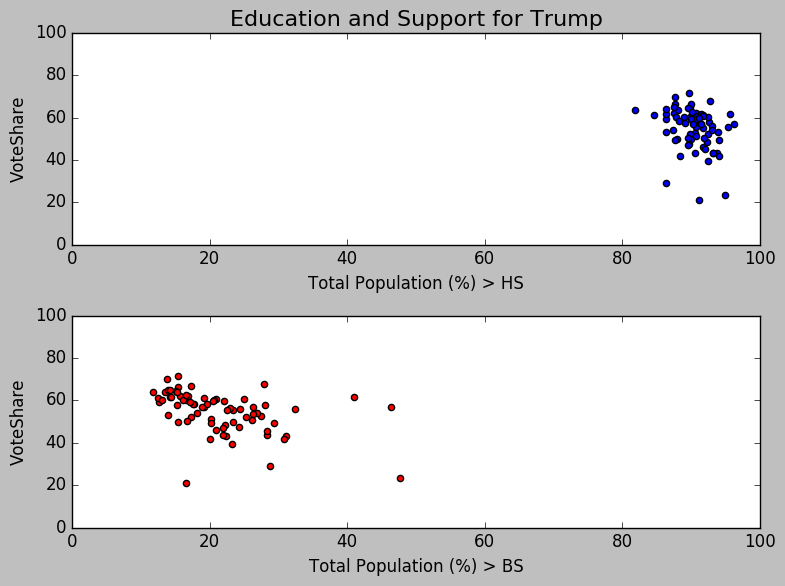

In [24]:
fig, ax = plt.subplots(2)

dfwi.plot(x="Total Population (%) > HS", y="VoteShare", ax=ax[0], kind="scatter",
                                 color="blue")
dfwi.plot(x="Total Population (%) > BS", y="VoteShare", ax=ax[1], kind="scatter",
                                   color="red")

# set axis limits
ax[0].set_xlim(0, 100)
ax[1].set_xlim(0, 100)
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)

# set axis title
ax[0].set_title("Education and Support for Trump", fontsize = 16)


fig.tight_layout()

We can see that the scatter above is clustered again, indicating a high level support for Trump within counties that have a high population of High School graduates, with a little more variance. The scatter below shows a weak negative relationship, support for Trump falls as the percentage of people with college degrees increases. This implies that while less educated people strongly supported Trump, the other segment of Wisconsin population wasn't vehement in showing their disapproval of the candidate.

## Wisonsin: Age and Support for Trump ##

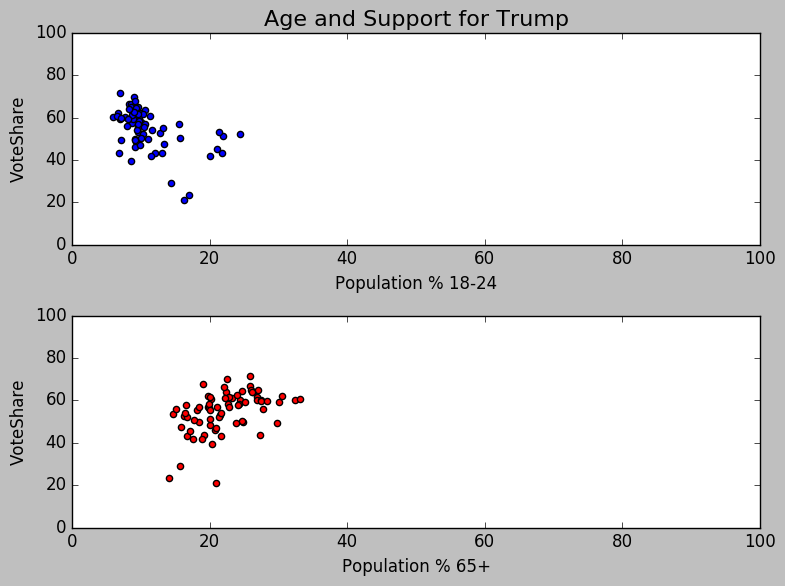

In [25]:
fig, ax = plt.subplots(2)

dfwi.plot(x="Population % 18-24", y="VoteShare", ax=ax[0], kind="scatter",
                                 color="blue")
dfwi.plot(x="Population % 65+", y="VoteShare", ax=ax[1], kind="scatter",
                                   color="red")

# set axis limits
ax[0].set_xlim(0, 100)
ax[1].set_xlim(0, 100)
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)

# set axis title
ax[0].set_title("Age and Support for Trump", fontsize = 16)


fig.tight_layout()

As the population percentage of 18-24 year olds increases there is a slight decline in support for Trump. The opposite holds true for the older demographics with a slightly stronger increase in support as their proportion increases. Putting the two together, we can see why the state voted red in this election.

## Wisonsin: Gender and Support for Trump ## 

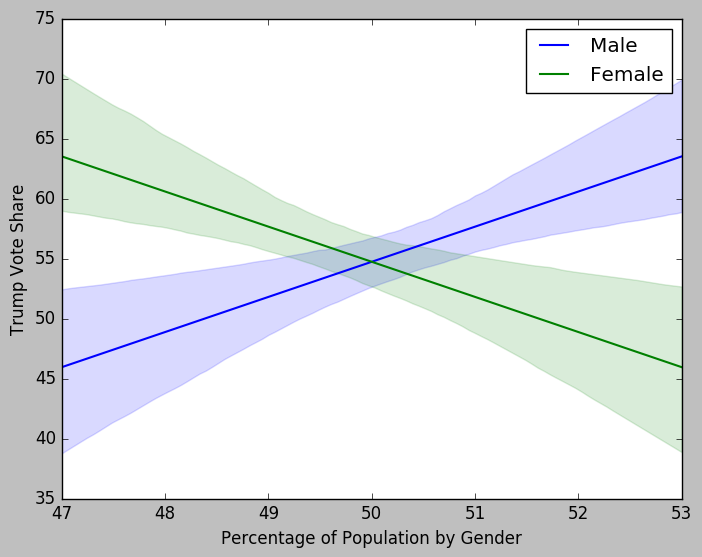

In [26]:
g = sns.regplot("% Male", "VoteShare", data=dfwi, scatter = False, label = "Male")
b = sns.regplot("% Female", "VoteShare", data=dfwi, scatter = False, label = "Female")
plt.legend(loc='upper right')
plt.xlabel('Percentage of Population by Gender')
plt.ylabel('Trump Vote Share')

We see the same contrast between voting patterns in Wisconsin counties as a greater percentage of population is either male or female. Counties with more than 50% men tended to be more supportive of Trump, whereas the percentage of women in a county increased support for Trump fell considerably.

## Wisonsin: Median Earnings and Support For Trump ### 

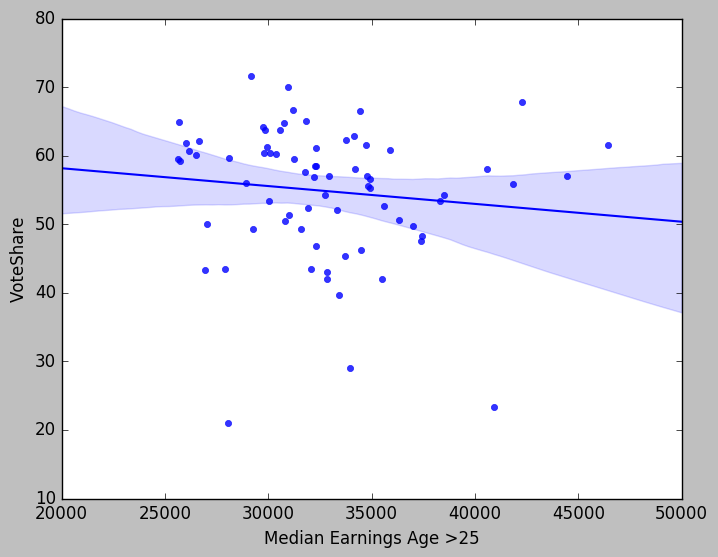

In [27]:
g = sns.regplot("Median Earnings Age >25", "VoteShare", data=dfwi)

There is a negative relationship between Median Earnings and Support for Trump. However the trend is relatively flat compared to the other states, and there is a high amount of variance from the trendline, helping explain the change from blue to red.

### Conclusion ###

While observing the general nationwide trend for factors that correlated with high support for Trump, it was hard to identify any discernible pattern for the Education, Age and Gender variables. However there was a negative trend between Median Earnings and Support for Trump. To explore the effects of these factors further, we decided to drill down on the four key rust-belt states that flipped from Blue to Red: Pennsylvania, Ohio, Wisconsin and Michigan. As observed from those datas there were indeed distinct demographic and economic factors within these states that correlated with high support for Trump. It was interesting to note that Median Earnings tended to have a negative relationship with support for Trump across all these states. The gender divide was also clearly observable in all states. The level of education within a county also tended to correlate with support for Trump with an observable negative relationship between the percentage of the county with a college degree and the corresponding voteshare for Trump. The correlation of age and support for Trump is also visible across all states, with a clear divide between the percentage of Younger and Older voters within a county and the corresponding support for Trump.

### Bibliography ###

Data Sources: https://github.com/mwaugh0328/Did-China-Cause-Trump

Election Data: https://data.world/aaronhoffman/us-general-election-2016

Census: https://www.census.gov/programs-surveys/acs/